In [1]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys


In [2]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [28]:
#Set Fonts/Plot Style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
rcParams['xtick.top'] = False
rcParams['ytick.right'] = False
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = False
rcParams['ytick.minor.visible'] = False

In [29]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 11)  #use file number
df.columns

Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [30]:
#temp = np.arange(7,33,3)   #(sample 4(100) H=2T)
#Erscan = np.arange(84,102,2)   
#Prscan = np.arange(85,103,2)


#temp= np.arange(7,35,3)   #sample 4(100) H=-2T
#Erscan = np.arange(128,148,2)
#Prscan = np.arange(129,149,2)

#temp = np.arange(7,33,3)   #(sample 4(110) H=2T)
#Erscan = np.arange(196,214,2)
#Prscan = np.arange(197,215,2)

temp = np.array([14,16,17,18,19,21,23,25,27])   #(sample 4(110) H=5T)
Erscan = np.arange(215,233,2)
Prscan = np.arange(216,234,2)

#temp = np.array([13,14,15,16,17,18,19,20,21,22,23,24,26,28])   #(sample 4(100) H=5T)
#Erscan = np.append(np.arange(266,284,2), np.arange(286,296,2))
#Prscan = np.append(np.arange(267,285,2), np.arange(287,297,2))


#temp = np.array([7,10,13,16,19,22,24,25,26,28,31])   #(sample 4(111) H=2T)
#Erscan = np.append(np.arange(331,345,2), [347,363,365,367])
#Prscan = np.append(np.arange(332,346,2), [348,364,366,368])


Erdata = []
Prdata = []

for i in range(len(temp)):
    Erdata.append(XMCD(sf,Erscan[i]))
    Prdata.append(XMCD(sf,Prscan[i]))
Erdata = np.array(Erdata)
Prdata = np.array(Prdata)


In [31]:
Erdata.shape

(9, 8, 151)

In [32]:
Er_energy = Erdata[:,0,:]
Er_TEYsum = Erdata[:,3,:]
Er_TEYxmcd = Erdata[:,4,:]
Er_TFYsum = Erdata[:,5,:]
Er_TFYxmcd = Erdata[:,6,:]
Pr_energy = Prdata[:,0,:]
Pr_TEYsum = Prdata[:,3,:]
Pr_TEYxmcd = Prdata[:,4,:]
Pr_TFYsum = Prdata[:,5,:]
Pr_TFYxmcd = Prdata[:,6,:]

In [33]:
Erdata.shape

(9, 8, 151)

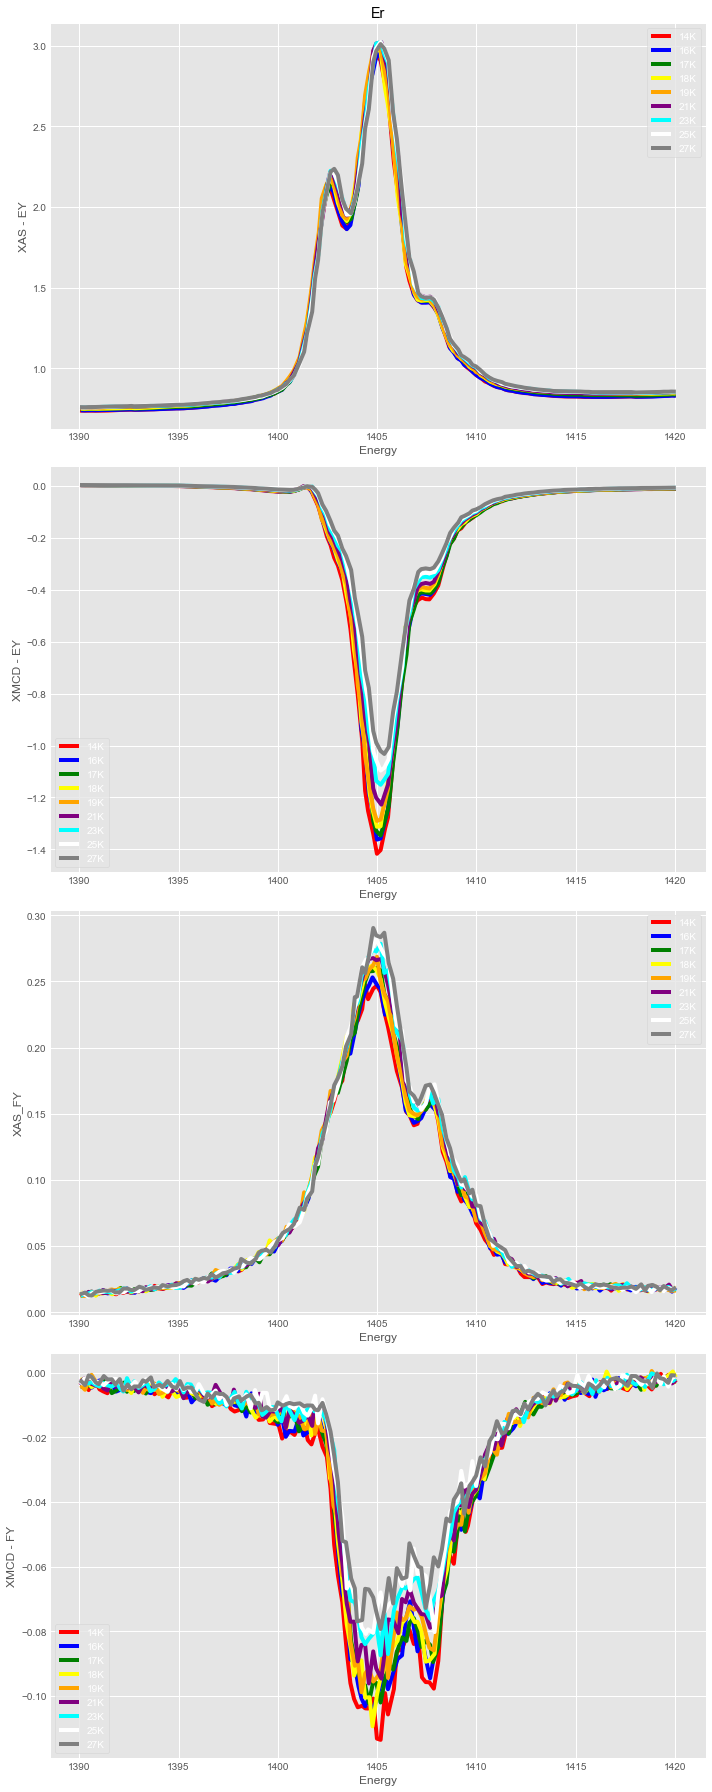

In [36]:
col = ["red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna']
colors=[]
for i in range(len(temp)):
    colors.append(col[i])
    
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(4,1,1)
ax.set_title('Er',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],Er_TEYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,2)
ax.set_ylabel('XMCD - EY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],Er_TEYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,3)
ax.set_ylabel('XAS_FY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],Er_TFYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,4)
ax.set_ylabel('XMCD - FY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],Er_TFYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()
plt.tight_layout()


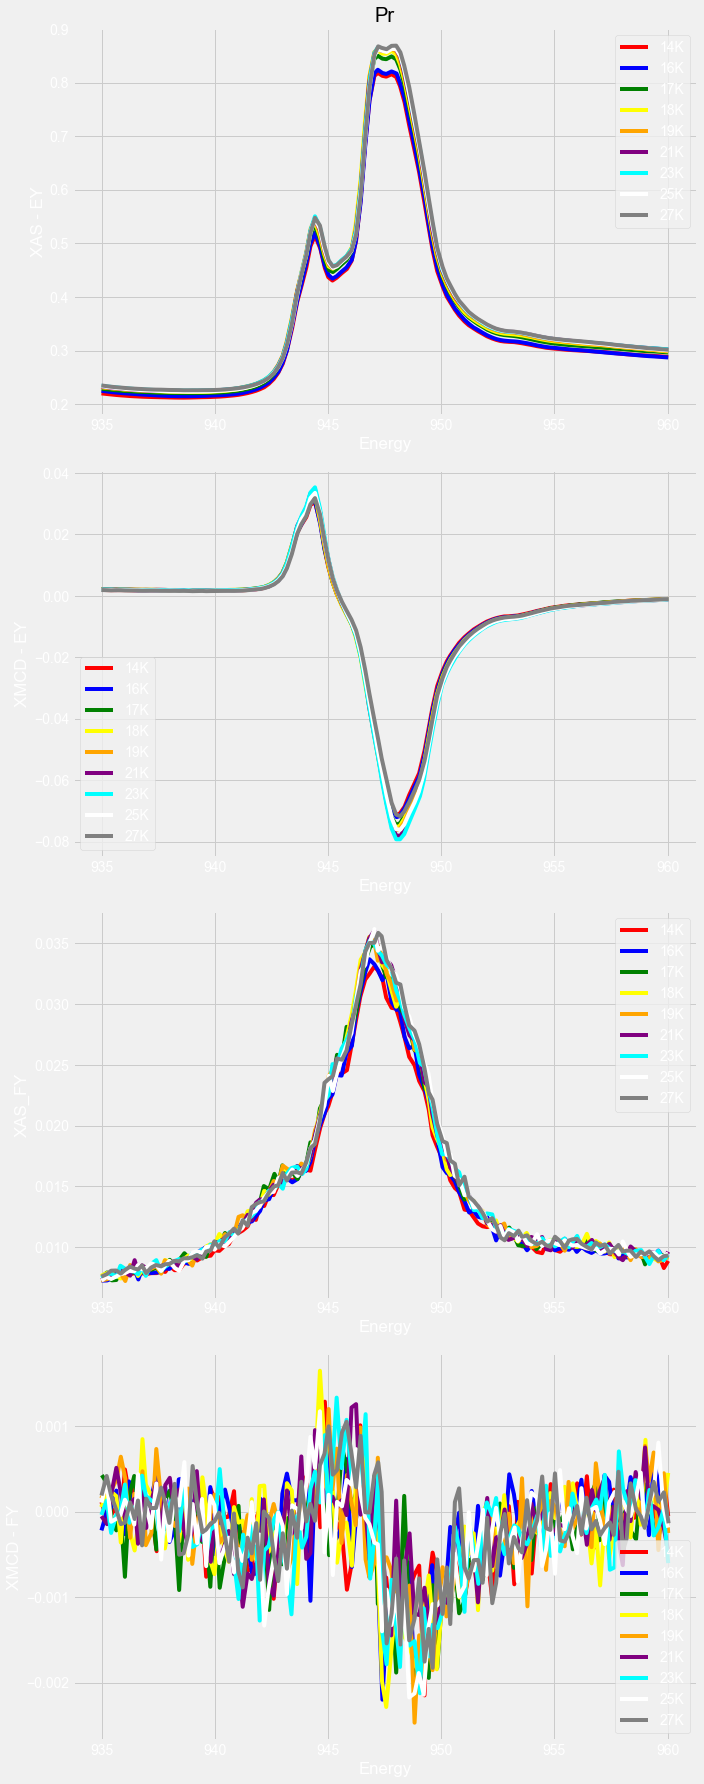

In [35]:
fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(4,1,1)
ax.set_title('Pr',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],Pr_TEYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,2)
ax.set_ylabel('XMCD - EY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],Pr_TEYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,3)
ax.set_ylabel('XAS_FY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],Pr_TFYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(4,1,4)
ax.set_ylabel('XMCD - FY')
ax.set_xlabel("Energy")
for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],Pr_TFYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()
plt.tight_layout()

In [12]:
ScEr_TEYsum = np.zeros(Er_TEYsum.shape)
ScEr_TEYxmcd = np.zeros(Er_TEYsum.shape)
for i in range(len(temp)):
    ScEr_TEYsum[i,:], ScEr_TEYxmcd[i,:] = norm_xmcd(Er_TEYsum[i,:],Er_TEYxmcd[i,:])
    
ScEr_TFYsum = np.zeros(Er_TEYsum.shape)
ScEr_TFYxmcd = np.zeros(Er_TEYsum.shape)
for i in range(len(temp)):
    ScEr_TFYsum[i,:], ScEr_TFYxmcd[i,:] = norm_xmcd(Er_TFYsum[i,:],Er_TFYxmcd[i,:])

    
ScPr_TEYsum = np.zeros(Pr_TEYsum.shape)
ScPr_TEYxmcd = np.zeros(Pr_TEYsum.shape)
for i in range(len(temp)):
    ScPr_TEYsum[i,:], ScPr_TEYxmcd[i,:] = norm_xmcd(Pr_TEYsum[i,:],Pr_TEYxmcd[i,:])
    
ScPr_TFYsum = np.zeros(Pr_TEYsum.shape)
ScPr_TFYxmcd = np.zeros(Pr_TEYsum.shape)
for i in range(len(temp)):
    ScPr_TFYsum[i,:], ScPr_TFYxmcd[i,:] = norm_xmcd(Pr_TFYsum[i,:],Pr_TFYxmcd[i,:])
    
#Correct XMCD zero

for i in range(len(temp)):
    ScEr_TEYxmcd[i,:] -=  np.average(ScEr_TEYxmcd[i,-5:-1])
    ScPr_TEYxmcd[i,:] -=  np.average(ScPr_TEYxmcd[i,-5:-1])

Normalization:  2.2084165427099998
Normalization:  2.21220779042
Normalization:  2.2358304864629996
Normalization:  2.2394238853969997
Normalization:  2.255019192745
Normalization:  2.2633400603
Normalization:  2.2626577907709997
Normalization:  2.265993198047
Normalization:  2.250598242705
Normalization:  0.23487742254809998
Normalization:  0.2397456746989
Normalization:  0.2475794267904
Normalization:  0.2495444104734
Normalization:  0.25646179829939997
Normalization:  0.2542939942763
Normalization:  0.26591421939180004
Normalization:  0.27049849530119996
Normalization:  0.2777151400018
Normalization:  0.6058818279939999
Normalization:  0.608876573134
Normalization:  0.629419948623
Normalization:  0.63732587798
Normalization:  0.639523624462
Normalization:  0.639371155682
Normalization:  0.6419671962
Normalization:  0.639477381099
Normalization:  0.642915067012
Normalization:  0.025689332164979997
Normalization:  0.02644710771621
Normalization:  0.02770810353902
Normalization:  0.028

In [13]:
#Fix energy shifts
#peak_pos_Er_p5T = (np.where(tey_sum_p5T_Er==np.nanmax(tey_sum_p5T_Er)))
#peak_pos_Er_n5T = (np.where(tey_sum_n5T_Er==np.nanmax(tey_sum_n5T_Er)))

#dif_Eng_Er_5T = energy_p5T_Er[peak_pos_Er_p5T] - energy_n5T_Er[peak_pos_Er_n5T]
#print(dif_Eng_Er_5T)
#energy_n5T_Er += dif_Eng_Er_5T

Text(0.5, 1.0, 'Pr_XMCD')

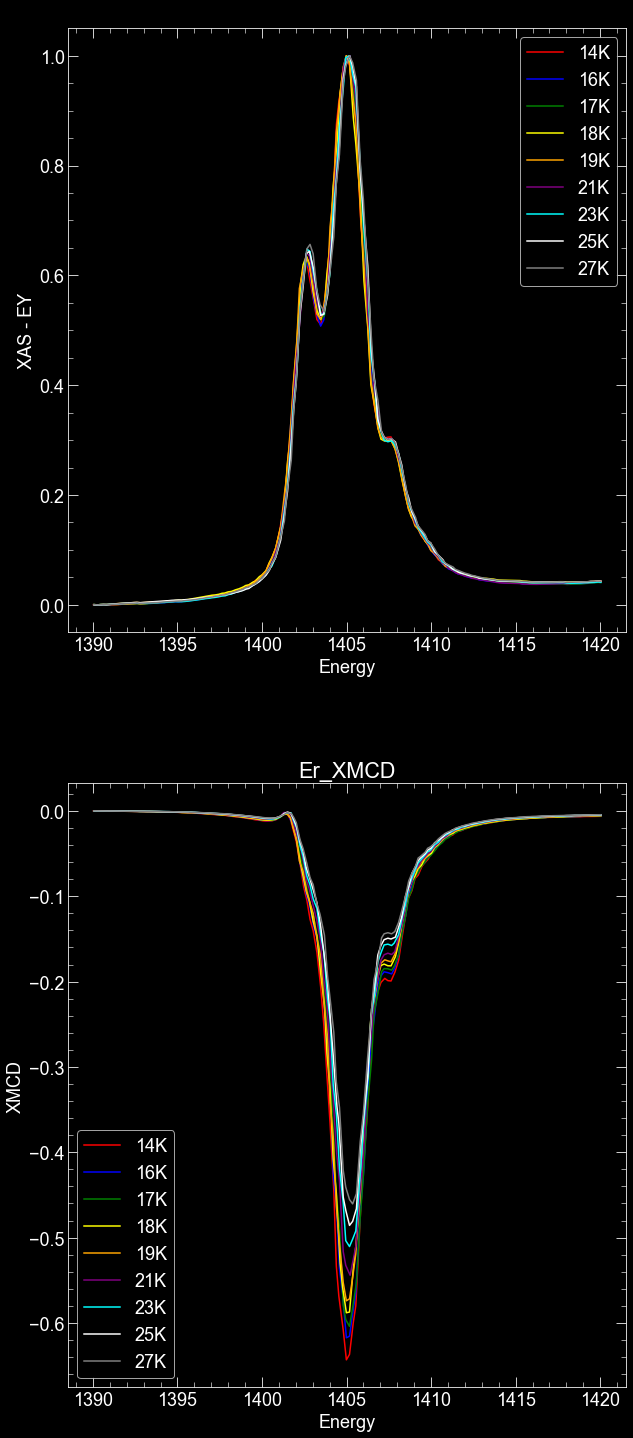

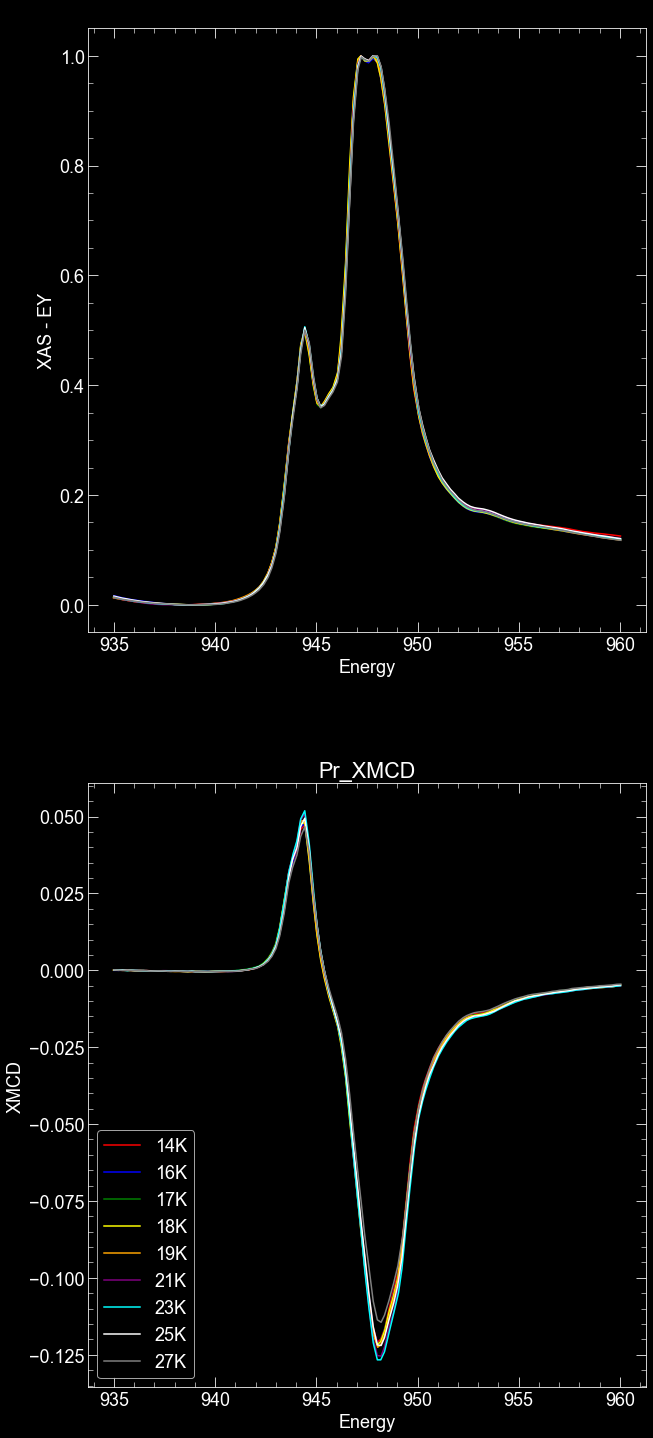

In [14]:
fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(2,1,1)
ax.set_title('Er',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],ScEr_TEYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()

ax = fig.add_subplot(2,1,2)
ax.set_ylabel('XMCD')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Er_energy[i,:],ScEr_TEYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()
ax.set_title('Er_XMCD')

fig = plt.figure(figsize=(10,25)) 
fig.subplots_adjust(hspace=.25)
ax = fig.add_subplot(2,1,1)
ax.set_title('Pr',color='k')
ax.set_ylabel('XAS - EY')
ax.set_xlabel('Energy')

for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],ScPr_TEYsum[i,:],color=colors[i],label=str(temp[i])+'K')
ax = fig.add_subplot(2,1,2)
ax.set_ylabel('XMCD')
ax.set_xlabel('Energy')
for i in range(len(temp)):
    ax.plot(Pr_energy[i,:],ScPr_TEYxmcd[i,:],color=colors[i],label=str(temp[i])+'K')
ax.legend()
ax.set_title('Pr_XMCD')

In [60]:
#Simple XMCD height analysis
Pk_XMCD_Er = np.zeros(temp.shape)
Pk_XMCD_Pr = np.zeros(temp.shape)

for i in range(len(temp)):
    if abs(np.nanmax(ScEr_TEYxmcd[i,:])) > abs(np.nanmin(ScEr_TEYxmcd[i,:])):
        Pk_XMCD_Er[i] = np.nanmax(ScEr_TEYxmcd[i,:])
    else:
        Pk_XMCD_Er[i] = np.nanmin(ScEr_TEYxmcd[i,:])
                  
for i in range(len(temp)):
    if abs(np.nanmin(ScPr_TEYxmcd[i,:])) > abs(np.nanmax(ScPr_TEYxmcd[i,:])):
        Pk_XMCD_Pr[i] = np.nanmin(ScPr_TEYxmcd[i,:]) 
    else:
        Pk_XMCD_Pr[i] = np.nanmax(ScPr_TEYxmcd[i,:])

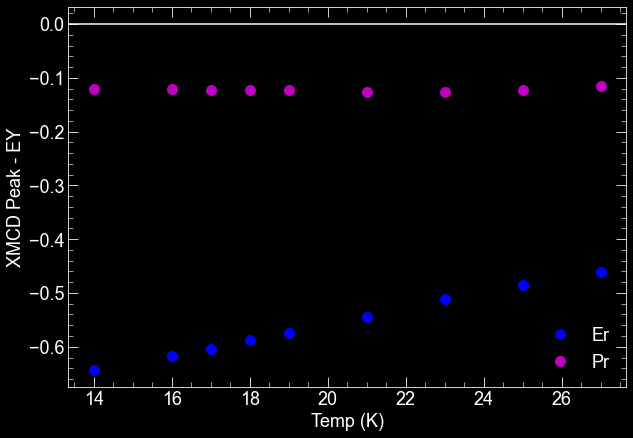

In [62]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD Peak - EY')
ax.set_xlabel('Temp (K)')
ax.plot(temp,Pk_XMCD_Er,'bo',label='Er',markersize=10)
ax.plot (temp,Pk_XMCD_Pr,'mo',label='Pr',markersize=10)
ax.axhline(0,color='w')
ax.legend(frameon=False)


In [16]:
#for all three directions

temp_100 = np.arange(7,33,3)
Pk_XMCD_Pr_100=[0.02363058, 0.0230728 , 0.02253117, 0.02304029, 0.02391649,
       0.02583746, 0.02957578, 0.03157042, 0.02925554]
Pk_XMCD_Er_100=[-0.5251221 , -0.48371482, -0.42527983, -0.38111355, -0.32974749,
       -0.28092163, -0.23076905, -0.19310871, -0.18027879]


temp_110 = np.arange(7,33,3)
Pk_XMCD_Pr_110=[-0.02079859, -0.01922973, -0.01820884, -0.02048718, -0.02636494,
       -0.03923559, -0.05720246, -0.05070271, -0.04057772]
Pk_XMCD_Er_110=[-0.5215139 , -0.47903757, -0.43134466, -0.38124422, -0.33057056,
       -0.27682731, -0.22517927, -0.20298239, -0.18800867]


temp_111 = np.array([7,10,13,16,19,22,24,25,26,28,31])
Pk_XMCD_Er_111=[-0.65442028, -0.62097945, -0.57664963, -0.52202922, -0.46183675,
       -0.39249523, -0.19873861, -0.20493182, -0.22654949, -0.203262  ,
       -0.19776286]
Pk_XMCD_Pr_111=[0.12026932, 0.12010687, 0.11526991, 0.10291609, 0.08631737,
       0.04862451,-0.09596869, -0.06542853,-0.06409981, -0.08411955,
       -0.04638494]

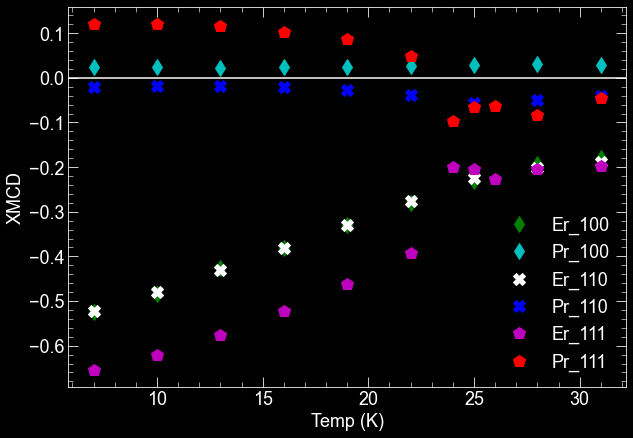

In [17]:
#for all three directions
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD')
ax.set_xlabel('Temp (K)')
ax.plot(temp_100,Pk_XMCD_Er_100, 'd',label='Er_100',color='g',markersize=12)
ax.plot(temp_100,Pk_XMCD_Pr_100,'d', label='Pr_100', color='c',markersize=12)
ax.plot(temp_110,Pk_XMCD_Er_110, 'X',label='Er_110', color='w',markersize=12)
ax.plot(temp_110,Pk_XMCD_Pr_110,'X',label='Pr_110', color='b',markersize=12)  
ax.plot(temp_111,Pk_XMCD_Er_111, 'p',label='Er_111', color='m',markersize=12)
ax.plot(temp_111,Pk_XMCD_Pr_111, 'p',label='Pr_111', color='r',markersize=12)
ax.axhline(0,color='w')
ax.legend(frameon=False)